Modified from: https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification

This Kernel for someone want to deep dive into image classification. I use CNN for classification model. If you found this Kernel helpful please up vote it. If you have some feedback and question don't forget to comment below. 

I have simplier model with 
* https://www.kaggle.com/uysimty/get-start-image-classification

# Import Library

In [0]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

# Define Constants

In [0]:
FAST_RUN = False
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# Prepare Traning Data

In [321]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-11-09 14:00:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c0a::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   179MB/s    in 0.4s    

2019-11-09 14:00:53 (179 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
dog_filenames = os.listdir("/tmp/cats_and_dogs_filtered/train/dogs")
cat_filenames = os.listdir("/tmp/cats_and_dogs_filtered/train/cats")
categories = []
for filename in dog_filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

for filename in cat_filenames:
  category = filename.split('.')[0]
  if category == 'dog':
      categories.append(1)
  else:
      categories.append(0)

df = pd.DataFrame({
    'filename': dog_filenames + cat_filenames,
    'category': categories
})

In [324]:
df.shape

(2000, 2)

In [325]:
df.head()

,filename,category
0,dog.516.jpg,1
1,dog.942.jpg,1
2,dog.65.jpg,1
3,dog.991.jpg,1
4,dog.407.jpg,1


In [326]:
df.tail()

,filename,category
1995,cat.908.jpg,0
1996,cat.455.jpg,0
1997,cat.440.jpg,0
1998,cat.536.jpg,0
1999,cat.264.jpg,0


### See Total In count

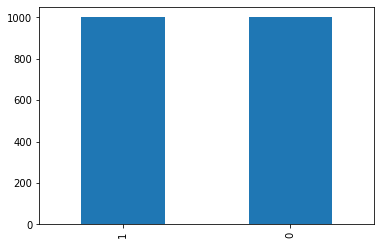

In [327]:
df['category'].value_counts().plot.bar()

From our data we have 1000 cats and 1000 dogs

* **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer. 

### Model 1

In [328]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

# This is the base model that was included in
# https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_38 (Batc (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_39 (Batc (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 54, 54, 64)      

### Model 2

In [329]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_42 (Batc (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_43 (Batc (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 54, 54, 64)      

### Model 3

In [330]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))
model3.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model3.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_45 (Batc (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_46 (Batc (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 54, 54, 64)      

### Model 4

In [347]:
model4 = Sequential()

model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model4.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model4.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_51 (Batc (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 394272)            0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                25233472  
_________________________________________________________________
batch_normalization_52 (Batc (None, 64)              

# Callbacks

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

**Early Stop**

To prevent over fitting we will stop the learning after 7 epochs and val_loss value not decreased

In [0]:
earlystop = EarlyStopping(patience=7)

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
callbacks = [earlystop, learning_rate_reduction]

# Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 

So we will convert 1 to dog and 0 to cat

In [0]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [0]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

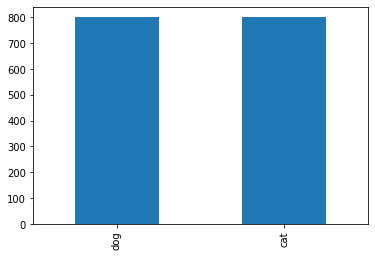

In [338]:
train_df['category'].value_counts().plot.bar()

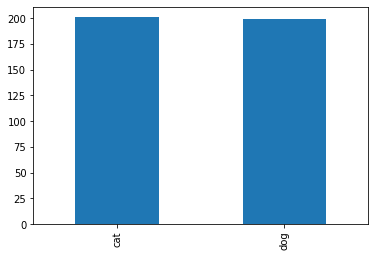

In [339]:
validate_df['category'].value_counts().plot.bar()

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=20

# Traning Generator

In [341]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_directory(
    directory='/tmp/cats_and_dogs_filtered/train/',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 2000 images belonging to 2 classes.


### Validation Generator

In [342]:
validation_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

validation_generator = validation_datagen.flow_from_directory(
    directory='/tmp/cats_and_dogs_filtered/train/',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 2000 images belonging to 2 classes.


Seem to be nice 

### Fit Model 1

In [343]:
epochs= 10
history1 = model1.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10
80/80 [==============================] - 58s 720ms/step - loss: 1.4672 - acc: 0.5723 - val_loss: 1.0600 - val_acc: 0.6375
Epoch 2/10
80/80 [==============================] - 45s 566ms/step - loss: 0.9223 - acc: 0.5918 - val_loss: 0.9177 - val_acc: 0.6687
Epoch 3/10
80/80 [==============================] - 47s 592ms/step - loss: 0.7664 - acc: 0.6223 - val_loss: 0.7313 - val_acc: 0.6188
Epoch 4/10
80/80 [==============================] - 50s 629ms/step - loss: 0.6808 - acc: 0.6582 - val_loss: 0.5932 - val_acc: 0.6859
Epoch 5/10
80/80 [==============================] - 49s 611ms/step - loss: 0.6218 - acc: 0.6746 - val_loss: 0.5277 - val_acc: 0.7312
Epoch 6/10
80/80 [==============================] - 48s 606ms/step - loss: 0.5664 - acc: 0.7230 - val_loss: 0.5597 - val_acc: 0.7438
Epoch 7/10
80/80 [==============================] - 54s 674ms/step - loss: 0.5499 - acc: 0.7281 - val_loss: 0.5295 - val_acc: 0.7468
Epoch 8/10
80/80 [==============================] - 55s 687ms/step - 

### Fit Model 2

In [344]:
epochs= 10
history2 = model2.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10
80/80 [==============================] - 56s 703ms/step - loss: 1.3922 - acc: 0.5645 - val_loss: 3.1122 - val_acc: 0.5391
Epoch 2/10
80/80 [==============================] - 49s 611ms/step - loss: 0.9156 - acc: 0.5985 - val_loss: 0.9839 - val_acc: 0.6500
Epoch 3/10
80/80 [==============================] - 51s 638ms/step - loss: 0.7887 - acc: 0.6168 - val_loss: 0.6974 - val_acc: 0.6422
Epoch 4/10
80/80 [==============================] - 52s 651ms/step - loss: 0.6724 - acc: 0.6457 - val_loss: 0.5932 - val_acc: 0.6987
Epoch 5/10
80/80 [==============================] - 51s 642ms/step - loss: 0.6357 - acc: 0.6641 - val_loss: 0.6733 - val_acc: 0.6719
Epoch 6/10
80/80 [==============================] - 53s 667ms/step - loss: 0.5870 - acc: 0.6965 - val_loss: 0.5839 - val_acc: 0.7094
Epoch 7/10
80/80 [==============================] - 53s 657ms/step - loss: 0.5785 - acc: 0.7020 - val_loss: 0.5119 - val_acc: 0.7500
Epoch 8/10
80/80 [==============================] - 50s 620ms/step - 

### Fit Model 3

In [345]:
epochs= 10
history3 = model3.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10
80/80 [==============================] - 57s 718ms/step - loss: 1.1566 - acc: 0.5762 - val_loss: 1.2521 - val_acc: 0.5719
Epoch 2/10
80/80 [==============================] - 48s 600ms/step - loss: 0.8323 - acc: 0.5887 - val_loss: 0.7306 - val_acc: 0.6391
Epoch 3/10
80/80 [==============================] - 51s 637ms/step - loss: 0.6968 - acc: 0.6348 - val_loss: 0.7948 - val_acc: 0.6203
Epoch 4/10
80/80 [==============================] - 55s 689ms/step - loss: 0.6544 - acc: 0.6410 - val_loss: 0.6363 - val_acc: 0.6474
Epoch 5/10
80/80 [==============================] - 51s 643ms/step - loss: 0.6124 - acc: 0.6848 - val_loss: 0.5818 - val_acc: 0.7016
Epoch 6/10
80/80 [==============================] - 48s 594ms/step - loss: 0.5667 - acc: 0.7152 - val_loss: 0.5621 - val_acc: 0.7078
Epoch 7/10
80/80 [==============================] - 46s 580ms/step - loss: 0.5326 - acc: 0.7309 - val_loss: 0.5116 - val_acc: 0.7740
Epoch 8/10
80/80 [==============================] - 50s 629ms/step - 

### Fit Model 4

In [348]:
epochs= 10
history4 = model4.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10
80/80 [==============================] - 54s 678ms/step - loss: 1.0174 - acc: 0.5770 - val_loss: 0.6987 - val_acc: 0.6609
Epoch 2/10
80/80 [==============================] - 46s 579ms/step - loss: 0.8095 - acc: 0.6008 - val_loss: 1.3973 - val_acc: 0.5281
Epoch 3/10
80/80 [==============================] - 49s 618ms/step - loss: 0.7380 - acc: 0.6059 - val_loss: 0.6717 - val_acc: 0.6312

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/10
80/80 [==============================] - 50s 630ms/step - loss: 0.6669 - acc: 0.6527 - val_loss: 0.5696 - val_acc: 0.6907
Epoch 5/10
80/80 [==============================] - 46s 578ms/step - loss: 0.6517 - acc: 0.6430 - val_loss: 0.5860 - val_acc: 0.6813
Epoch 6/10
80/80 [==============================] - 44s 546ms/step - loss: 0.6277 - acc: 0.6730 - val_loss: 0.6316 - val_acc: 0.6438

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 7/10
80/80 [======================

# Save Model

In [0]:
#model.save_weights("model.h5")

# Virtualize Training

### Model 1 Training Viz

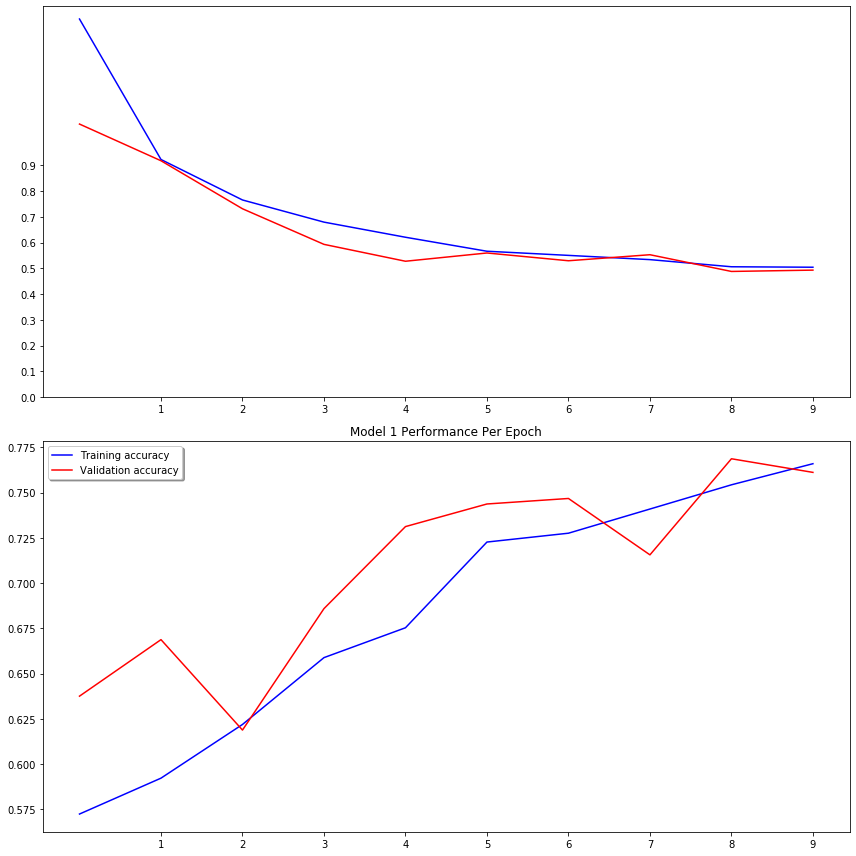

In [350]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
plt.title('Model 1 Performance Per Epoch')
ax1.plot(history1.history['loss'], color='b', label="Training loss")
ax1.plot(history1.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history1.history['acc'], color='b', label="Training accuracy")
ax2.plot(history1.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### Model 2 Training Viz

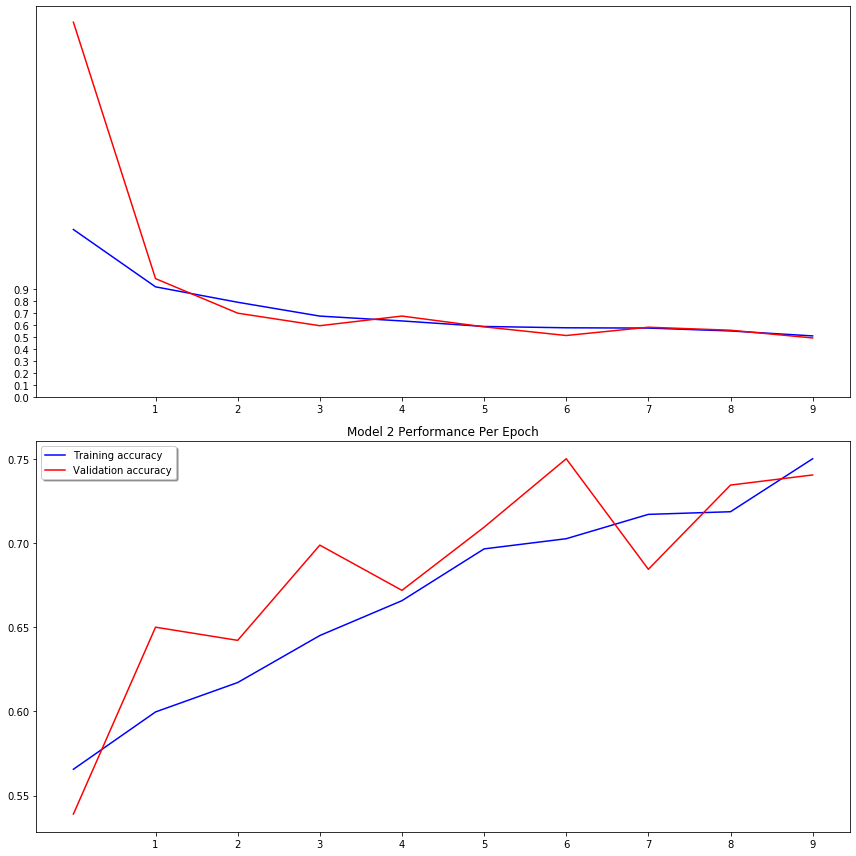

In [352]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
plt.title('Model 2 Performance Per Epoch')
ax1.plot(history2.history['loss'], color='b', label="Training loss")
ax1.plot(history2.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history2.history['acc'], color='b', label="Training accuracy")
ax2.plot(history2.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### Model 3 Training Viz

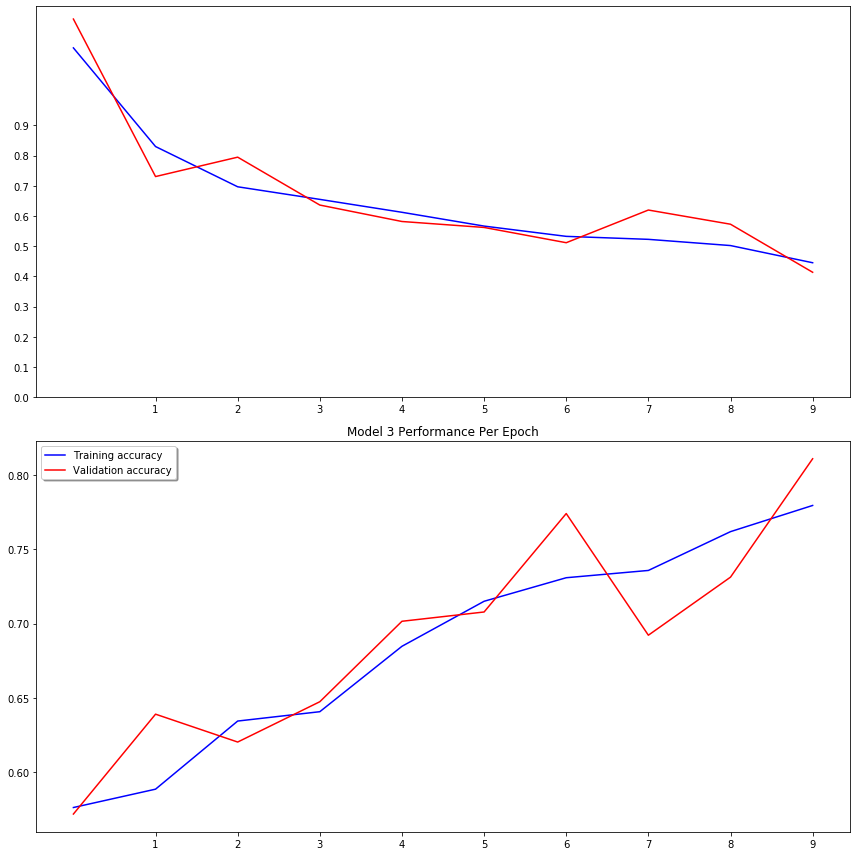

In [354]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
plt.title('Model 3 Performance Per Epoch')
ax1.plot(history3.history['loss'], color='b', label="Training loss")
ax1.plot(history3.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history3.history['acc'], color='b', label="Training accuracy")
ax2.plot(history3.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### Model 4 Training Viz

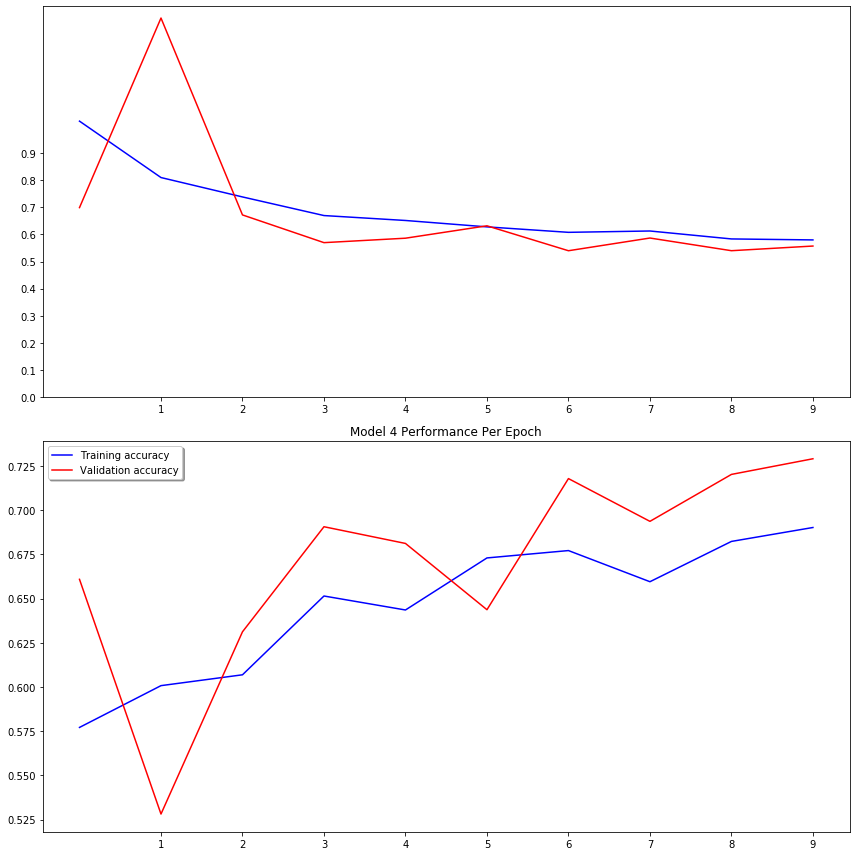

In [355]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
plt.title('Model 4 Performance Per Epoch')
ax1.plot(history4.history['loss'], color='b', label="Training loss")
ax1.plot(history4.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history4.history['acc'], color='b', label="Training accuracy")
ax2.plot(history4.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing Data

In [356]:
# Load the test images from gdrive
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
# Unzip the kaggle test.zip file from Google Drive
kaggle_zip = '/content/gdrive/My Drive/MSDS_422/test.zip'
kaggle_zip_ref = zipfile.ZipFile(kaggle_zip, 'r')
kaggle_zip_ref.extractall('/tmp')
kaggle_zip_ref.close()

In [358]:
import re
test_df = pd.DataFrame() 
file_names = os.listdir("/tmp/test/test_folder/test")

# remove the .jpg file extension
test_df['id'] =  [re.sub(r'.jpg','', str(x)) for x in file_names]

# os.listdir jumbles the output so sort the values
# coerce to numberic first and then sort
test_df['id'] = pd.to_numeric(test_df['id'], downcast = 'signed')
test_df = test_df.sort_values(by=['id'])

# copy the test_df four times for each of the
# four models
test_df1 = test_df
test_df2 = test_df
test_df3 = test_df
test_df4 = test_df

print(test_filenames[0:5])
print(test_df[0:4])
test_df.shape

['4229.jpg', '7152.jpg', '2577.jpg', '8261.jpg', '2185.jpg']
       id
8098    1
931     2
7070    3
11147   4


(12500, 1)

# Create Testing Generator

In [359]:
test_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_generator = test_datagen.flow_from_directory(
    directory="/tmp/test",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)


Found 12500 images belonging to 1 classes.


# Predict

### Model 1 Predictions

In [0]:
predict1 = model1.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [361]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred1=model1.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

12500/12500 [==============================] - 254s 20ms/step


In [368]:
is_dog1 = pred1
test_df1['label'] = is_dog1
test_df1.head()

,id,label
8098,1,0.528750
931,2,0.946228
7070,3,0.931321
11147,4,0.082476
8254,5,0.198993


### Model 2 Predictions

In [0]:
predict2 = model2.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [364]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred2 = model2.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

12500/12500 [==============================] - 271s 22ms/step


In [367]:
is_dog2 = pred2[:,0]
test_df2['label'] = is_dog2
test_df2.head()

,id,label
8098,1,0.472151
931,2,0.933270
7070,3,0.786128
11147,4,0.151848
8254,5,0.151636


### Model 3 Predictions

In [0]:
predict3 = model3.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [370]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred3 = model3.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

12500/12500 [==============================] - 256s 20ms/step


In [371]:
is_dog3 = pred3[:,0]
test_df3['label'] = is_dog3
test_df3.head()

,id,label
8098,1,0.198026
931,2,0.884779
7070,3,0.639107
11147,4,0.006600
8254,5,0.460356


### Model 4 Predictions

In [0]:
predict4 = model4.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [373]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred4 = model4.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

12500/12500 [==============================] - 262s 21ms/step


In [374]:
is_dog4 = pred4[:,0]
test_df4['label'] = is_dog4
test_df4.head()

,id,label
8098,1,0.647348
931,2,0.764266
7070,3,0.737157
11147,4,0.310713
8254,5,0.210307


### Virtaulize Result

In [375]:
test_df1['label'].value_counts().plot.bar()

Error in callback <function flush_figures at 0x7f527b50d158> (for post_execute):


KeyboardInterrupt: ignored

KeyboardInterrupt: ignored

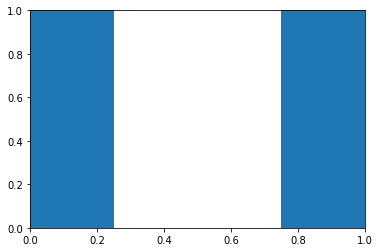

In [376]:
test_df2['label'].value_counts().plot.bar()

In [0]:
test_df3['label'].value_counts().plot.bar()

In [0]:
test_df4['label'].value_counts().plot.bar()

# Submission

In [0]:
export_csv = test_df1.to_csv (r'/content/gdrive/My Drive/MSDS_422/catvdog1.csv',
                        index = None,
                        header=True)

In [0]:
export_csv = test_df2.to_csv (r'/content/gdrive/My Drive/MSDS_422/catvdog2.csv',
                        index = None,
                        header=True)

In [0]:
export_csv = test_df3.to_csv (r'/content/gdrive/My Drive/MSDS_422/catvdog3.csv',
                        index = None,
                        header=True)

In [0]:
export_csv = test_df4.to_csv (r'/content/gdrive/My Drive/MSDS_422/catvdog4.csv',
                        index = None,
                        header=True)